# **Python FWD Codebase**
Written for instructional purposes only. You do not need to know Python to use this tool. Follow instructions and click on the arrow symbol next to each cell to execute said cell. 

For source code, visit [github/egemenokte](https://github.com/egemenokte/3DLayeredElastic)

#First Things First!

*   You are given a GitHub repository (you can download and run yourself if you want)
*   Follow the instructions provided in this document to execute and analyze FWD code/data. 
*   Work your way sequentially, following the instructions above each cell.
*   If you run into errors, restart runtime from the Runtime tab.










In [18]:
!git clone https://github.com/egemenokte/PavementPython.git
%cd PavementPython/FWDPython/Run

#Import packages necessary for FWD analysis
import sys
import os
sys.path.append('..')
from Main.MDA import Layer3D
from Main.MDA import noise
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import clear_output

def plotfunc(RS,Expected=[]):
    sns.set(font_scale=1.5,rc={'figure.figsize':(9,7)})
    plt.close('all')
    response='deflection_z' 
    A=RS[response][0,:,:].flatten()#/RS[response][0,0,:].flatten()
    # A=RS['sigma_z'][0,:,:]
    plt.plot(x,-1000*A,'-o') #normally, positive is compression, but we reversed for analysis
    plt.xlabel('Offset (in)')
    plt.ylabel('Deflection (mils)')
    if len(Expected)==0:
        plt.title('Deflections')
    else:
        plt.plot(x,Expected*-1000,'-o') 
        plt.title('Deflection avg difference %: '+ str(np.round(np.mean(np.abs((A-Expected)/Expected*100)),2)))
        plt.legend(['Current','Baseline'])

for i in range(10):
    clear_output(wait=True)
    print("All good, move to the next step")

All good, move to the next step


# Question 1) Sensitivity Analysis
You are given a structure with specific properties. Change the modulus/thickness of different layers to see its impact on the design

Running Elastic Analysis...

Results (you can copy and paste to Excel)



,Offset (in),Deflection (mils),Baseline (mils)
Point,,,
1,0,-15.463083,-15.46308
2,8,-12.172725,-12.17273
3,12,-10.800864,-10.80086
4,18,-9.203645,-9.20365
5,24,-7.995715,-7.99572
6,36,-6.275986,-6.27599
7,60,-4.183165,-4.18317


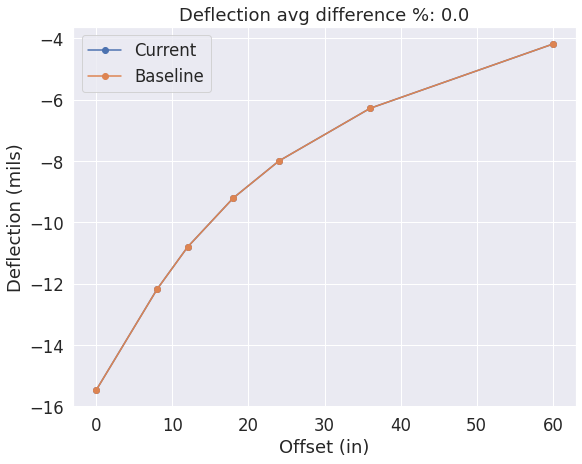

In [22]:
## YOU CAN CHANGE THESE PARAMETERS IF NECESSARY################################
E = [500, 50, 10]           # Layer Modulus (ksi), [Top Layer, Second to top layer,...,Subgrade]
H = [6, 18]                 # Layer Thicknesses (inch), [Top Layer, Second to top layer,...,nth layer]. Subgrade is not required and assumed semi-infinite
nu = [0.35, 0.4, 0.45]      # Poissons ratio, [Top Layer, Second to top layer,...,Subgrade]
L=[9]                       # Load Magnitudes (kip)
LPos=[(0,0)]                # Load positions as (x,y) (inch)
a = 4                       # Contact radius (inch)
x = [0,8,12,18,24,36,60]    # x query points for FWD (inch) 
y=[0]                       # y query points (inch) 
z =[0.0001]                 # z (depth) query points (inch)
###############################################################################

############################ DO NOT CHANGE BELOW THIS LINE#####################
if np.sum(E)==0 or np.sum(H)==0: #initial check
    raise ValueError('Please assign moduli and thickness to each layer')

## Layered elastic analysis settings. Do not change unless slow or unstable
ZRO=7*1e-22
isBD=np.ones(len(E))
it = 1600                   # number of iterations
tolerance=0.01 #percent error
print('Running Elastic Analysis...')
RS=Layer3D(L,LPos,a,x,y,z,H,E,nu,it,ZRO,isBD,tolerance,verbose=False)

#Print Results
Baseline=np.array([0.01546308, 0.01217273, 0.01080086, 0.00920365, 0.00799572, 0.00627599, 0.00418317]) #inches
#Plots the 0th y axis   
plotfunc(RS,Baseline)
print('\nResults (you can copy and paste to Excel)\n')
d = {'Offset (in)': x, 'Deflection (mils)': RS['deflection_z'][0,:,:].flatten()*-1000,'Baseline (mils)':Baseline*-1000}
Deflections = pd.DataFrame(data=d)
Deflections.index=Deflections.index+1
Deflections.index.name = 'Point'
Deflections
#%%

# Question 2) Manual iteration
You are given a baseline profile. Try to find the parameters that will result in the given deflection profile. In the cell below, define the thicknesses, moduli of layers. Start with reasonable values. Load, contact radius, Poisson's ratio and FWD evaluation points are already defined for you. Then you can run the elastic analysis. Iterate as needed

In [ ]:
## YOU CAN CHANGE THESE PARAMETERS IF NECESSARY############################
E = [0, 0, 0]             # Layer Modulus (ksi), [Top Layer, Second to top layer,...,Subgrade]
H = [0, 0]                # Layer Thicknesses (inch), [Top Layer, Second to top layer,...,nth layer]. Subgrade is not required and assumed semi-infinite
nu = [0.35, 0.4, 0.45]    # Poissons ratio, [Top Layer, Second to top layer,...,Subgrade]
L=[9]                     # Load Magnitudes (kip)
LPos=[(0,0)]              # Load positions as (x,y) (inch)
a = 4                     # Contact radius (inch)
x = [0,8,12,18,24,36,60]  # x query points for FWD (inch) 
y=[0]                     # y query points (inch) 
z =[0.0001]               # z (depth) query points (inch)
##########################################################################

############### DO NOT CHANGE BELOW THIS LINE#############################

if np.sum(E)==0 or np.sum(H)==0: #initial check
    raise ValueError('Please assign moduli and thickness to each layer')

## Layered elastic analysis settings. Do not change unless slow or unstable
ZRO=7*1e-22
isBD=np.ones(len(E))
it = 1600                   # number of iterations
tolerance=0.01 #percent error
print('Running Elastic Analysis...')
RS=Layer3D(L,LPos,a,x,y,z,H,E,nu,it,ZRO,isBD,tolerance,verbose=False)

#Print Results
Expected=np.array([0.01653036,0.01197781,0.00999503,0.00784816,0.00637635,0.0045364 ,0.00272343]) #inches

#Plots the 0th y axis   
plotfunc(RS,Expected)

print('\nResults (you can copy and paste to Excel)\n')
d = {'Offset (in)': x, 'Deflection (mils)': RS['deflection_z'][0,:,:].flatten()*-1000,'Expected (mils)':Expected*-1000}
Deflections = pd.DataFrame(data=d)
Deflections.index=Deflections.index+1
Deflections.index.name = 'Point'
Deflections #dy ki ob b ob 
#%%



# Question 3) Solving for Unknown Layer Properties
In this section, define initial layer properties and use the sklearn curve_fit function to find ideal parameters.

In [ ]:
from scipy.optimize import curve_fit #import curve_fit function
Expected2=np.array([0.02114734, 0.0155243 , 0.01329134, 0.01097187, 0.00928984,0.0068977 , 0.00419102]) #inches
## YOU CAN CHANGE THESE PARAMETERS #############################
noiserate=0/100              # equipment noise
E0=[0,0,0]                   # Initial guess for material properties in ksi
H0=[0,0]                     # Initial guess for thicknesses in inch
thicknessknown=False         # Are the layer thicknesses known?


nu = [0.35, 0.4, 0.45]       # Poissons ratio, [AC, Base, Subgrade]
L=[9]                        # Load Magnitudes (kip)
LPos=[(0,0)]                 # Load positions as (x,y) (inch)
a = 4                        # Contact radius (inch)
x = [0,8,12,18,24,36,60]     # x query points for FWD (inch) 
y=[0]                        # y query points (inch) 
z =[0.0001]                  # z (depth) query points (inch)
################################################################

############## DO NOT CHANGE BELOW THIS LINE ###################
ZRO=7*1e-22
isBD=np.ones(len(E0))
it = 1600                   # number of iterations
tolerance=0.01 #percent error
count=0
if np.sum(E0)==0 or np.sum(H0)==0: #initial check
    raise ValueError('Please assign initial moduli and thickness to each layer')

if thicknessknown:
    initialguess=E0
    def func(x2,E1,E2,E3): #this is the function that defines the predictive function
        global count
        RS=Layer3D(L,LPos,a,x,y,z,H0,[E1,E2,E3],nu,it,ZRO,isBD,tolerance,verbose=False)
        TT=np.transpose(RS['deflection_z'][0,:,:]).flatten()
        count=count+1
        return TT
else:
    initialguess=np.concatenate((E0,H0))
    def func(x2,E1,E2,E3,H1,H2): #this is the function that defines the predictive function
        global count
        RS=Layer3D(L,LPos,a,x,y,z,[H1,H2],[E1,E2,E3],nu,it,ZRO,isBD,tolerance,verbose=False)
        TT=np.transpose(RS['deflection_z'][0,:,:]).flatten()
        count=count+1
        return TT
###################
print('Solving for parameters. Please wait...')
Expected2s=Expected2*noise(noiserate)
Efinal, pcov = curve_fit(func, np.arange(0,len(Expected2s)+1), Expected2s,initialguess) #Solve for the parameters

Hfinal=H0 if thicknessknown else Efinal[3:] #dy al on d oi
Efinal=Efinal[:3]
print('Converged after ',count, ' iterations\n')
#print('Moduli (ksi)',Efinal)
#print('Thickness (in)',Hfinal)
RS=Layer3D(L,LPos,a,x,y,z,Hfinal,Efinal,nu,it,ZRO,isBD,tolerance,verbose=False)
plotfunc(RS,Expected2) 
d = {'Layer': np.arange(1,len(E0)+1), 'Modulus (ksi)': Efinal,'Thickness (in)':np.append(Hfinal,np.inf)}
Layers = pd.DataFrame(data=d)
Layers=Layers.set_index('Layer')
print('\nResults (you can copy and paste to Excel)\n')
Layers.index=Layers.index+1
Layers.index.name = 'Point'
Layers